In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath('..'))
from src.utils.seed import set_seed
from src.utils.config import Config

set_seed(42)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

c:\Users\surya\anaconda3\envs\torch-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from pathlib import Path

config = Config('../configs/config.yaml')

# Resolve path relative to project root
project_root = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
data_path = project_root / config.data['processed_data_path']
print(f"Loading data from: {data_path}")

df = pd.read_csv(data_path)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Loading data from: c:\Users\surya\OneDrive\Desktop\AI-Based-approach-for-prioritization-of-genetic-mutations\data\processed\feature_matrix_processed.csv
Dataset shape: (186876, 8)

First few rows:


,AF,CADD_PHRED,conservation_score,variant_type_SNV,impact_category_conservative,impact_category_moderate,impact_category_radical,pathogenicity_label
0,0.234610,-0.988790,-0.779439,1.0,0.0,1.0,0.0,0
1,0.718613,-0.691173,0.727793,1.0,0.0,1.0,0.0,0
2,0.213814,-0.754900,-0.222213,1.0,0.0,1.0,0.0,0
3,2.377384,-0.105154,-1.414401,1.0,0.0,1.0,0.0,0
4,0.224871,-0.364998,-1.633402,1.0,0.0,1.0,0.0,0


In [4]:
print("Dataset Info:")
print(df.info())
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nSummary statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186876 entries, 0 to 186875
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AF                            186876 non-null  float64
 1   CADD_PHRED                    186876 non-null  float64
 2   conservation_score            186876 non-null  float64
 3   variant_type_SNV              186876 non-null  float64
 4   impact_category_conservative  186876 non-null  float64
 5   impact_category_moderate      186876 non-null  float64
 6   impact_category_radical       186876 non-null  float64
 7   pathogenicity_label           186876 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 11.4 MB
None

Missing values:
AF                              0
CADD_PHRED                      0
conservation_score              0
variant_type_SNV                0
impact_category_conservative    0
impact_category_moderate        0

,AF,CADD_PHRED,conservation_score,variant_type_SNV,impact_category_conservative,impact_category_moderate,impact_category_radical,pathogenicity_label
count,1.868760e+05,1.868760e+05,1.868760e+05,186876.0,186876.000000,186876.000000,186876.000000,186876.000000
mean,-1.253210e-16,-8.638633e-17,3.856967e-16,1.0,0.248994,0.714281,0.036725,0.458989
std,1.000003e+00,1.000003e+00,1.000003e+00,0.0,0.432431,0.451757,0.188086,0.498317
min,-9.392942e-01,-1.890057e+00,-2.868003e+00,1.0,0.000000,0.000000,0.000000,0.000000
25%,-8.612405e-01,-8.263054e-01,-7.458999e-01,1.0,0.000000,0.000000,0.000000,0.000000
50%,-3.775079e-01,-8.343470e-02,1.534344e-01,1.0,0.000000,1.000000,0.000000,0.000000
75%,6.533181e-01,8.456088e-01,8.375749e-01,1.0,0.000000,1.000000,0.000000,1.000000
max,4.285965e+00,3.168262e+00,1.646514e+00,1.0,1.000000,1.000000,1.000000,1.000000


Target distribution (pathogenicity_label):
0    101102
1     85774
Name: pathogenicity_label, dtype: int64

Class balance:


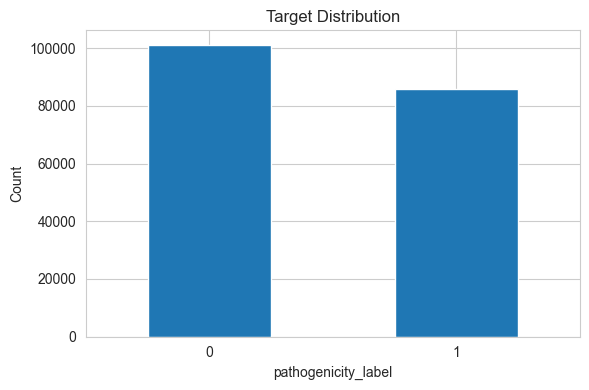

In [9]:
target_col = config.data['target_col']
print(f"Target distribution ({target_col}):")
print(df[target_col].value_counts())
print(f"\nClass balance:")

plt.figure(figsize=(6, 4))
df[target_col].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
numerical_features = config.data['numerical_features']
categorical_features = config.data['categorical_features']

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['AF', 'CADD_PHRED', 'conservation_score']
Categorical features: ['variant_type', 'impact_category']


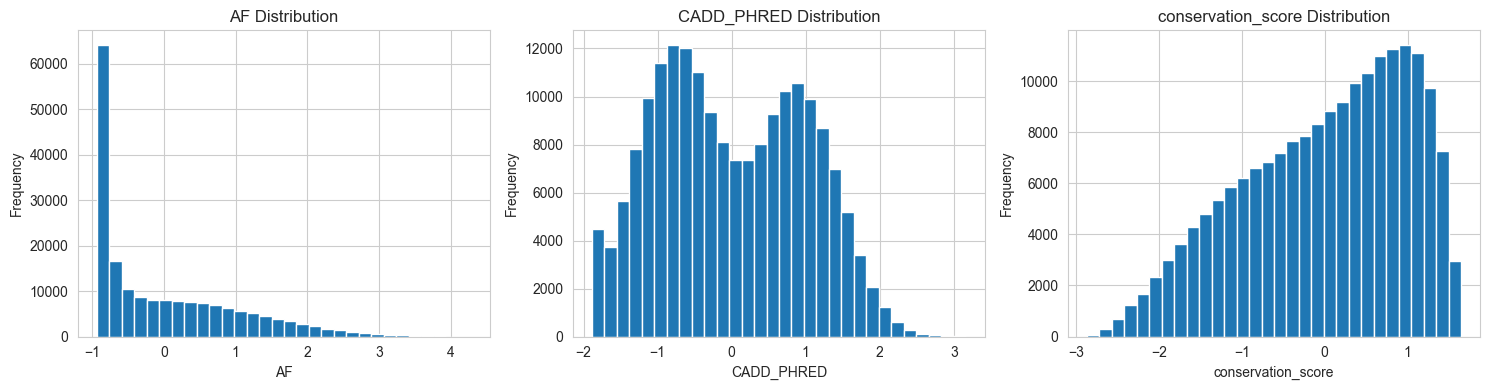

In [11]:
if numerical_features:
    fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 4))
    if len(numerical_features) == 1:
        axes = [axes]
    
    for idx, feat in enumerate(numerical_features):
        df[feat].hist(bins=30, ax=axes[idx])
        axes[idx].set_title(f'{feat} Distribution')
        axes[idx].set_xlabel(feat)
        axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

C:\Users\surya\AppData\Local\Temp\ipykernel_11620\3945556018.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_interim = pd.read_csv(interim_path)


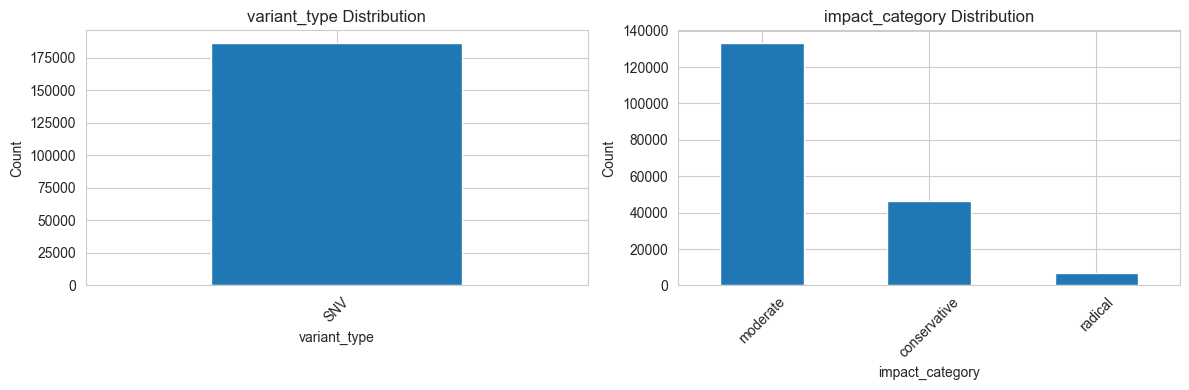

In [15]:
# Load interim data (before one-hot encoding) to visualize categorical features
interim_path = project_root / config.data['interim_data_path']
df_interim = pd.read_csv(interim_path)

if categorical_features:
    fig, axes = plt.subplots(1, len(categorical_features), figsize=(12, 4))
    if len(categorical_features) == 1:
        axes = [axes]
    
    for idx, feat in enumerate(categorical_features):
        df_interim[feat].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'{feat} Distribution')
        axes[idx].set_xlabel(feat)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()

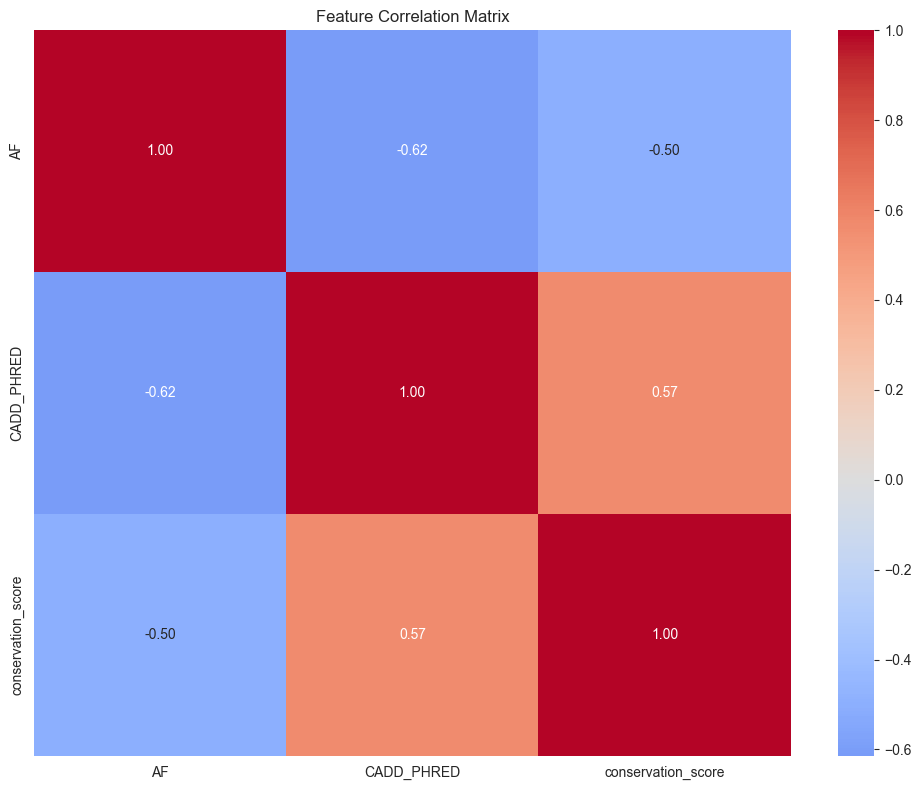

In [13]:
if numerical_features and len(numerical_features) > 1:
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [14]:
print("✓ Data exploration complete!")
print(f"Dataset ready for training: {df.shape[0]} samples, {df.shape[1]} features")

✓ Data exploration complete!
Dataset ready for training: 186876 samples, 8 features
